## Exploratory Data Analysis
Here we perform EDA to understand the dataset for highlighting important relationships and patterns that will inform subsequent modeling and analysis efforts.
1. Pair Plots for Selected Features
2. Correlation Heatmap for Price Variables.
3. PCA to Understand Categorical Variables' Impact on Avg Price.

### 1. Pair plots show the relationships between pairs of variables and can reveal potential correlations, distributions, and patterns.

/home/vanel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vanel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vanel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vanel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

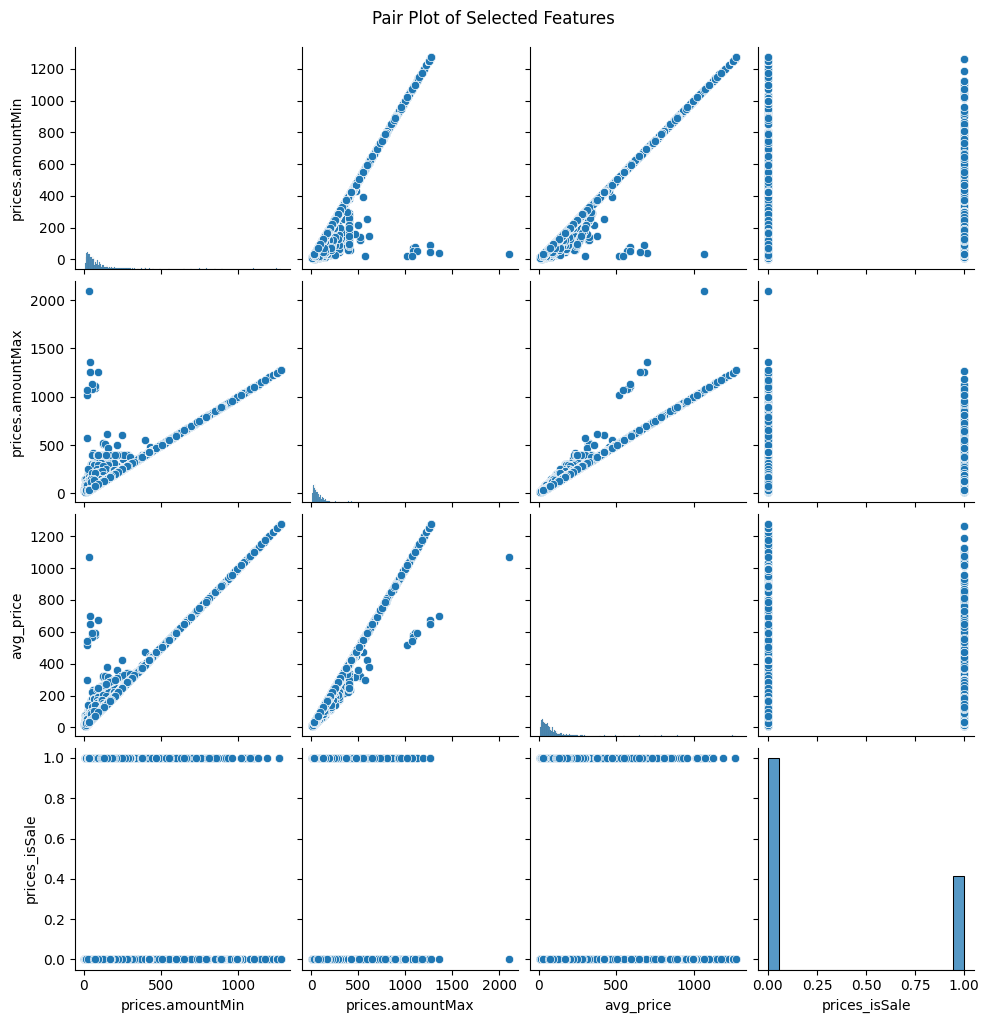

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("shoes.csv")

# Ensure column names are consistent
df.rename(columns={
    'prices.condition': 'prices_condition',
    'prices.currency': 'prices_currency',
    'prices.isSale': 'prices_isSale'
}, inplace=True)

# Select numerical columns for EDA
numerical_cols = ['prices.amountMin', 'prices.amountMax', 'avg_price']

# Select columns for pair plot and correlation heatmap 
eda_cols = numerical_cols + ['brand', 'categories', 'colors', 'prices_isSale','prices_condition', 
                             'prices_currency', 'merchant_source', 'shoe_category']
# Replace infinite values with NaN
pd.option_context('mode.use_inf_as_na', True)
# Drop rows with missing values in the selected columns for EDA
df_eda = df[eda_cols].dropna()

# Replace infinite values with NaN
pd.option_context('mode.use_inf_as_na', True)

# Drop rows with NaN values after replacing infinities
df_eda.dropna(inplace=True)

# Convert categorical variables to numeric for the heatmap
df_eda_encoded = pd.get_dummies(df_eda, drop_first=True)

# Pair Plots
sns.pairplot(df_eda)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


The pair plot visualizes the relationships between three numerical features: prices.amountMin, prices.amountMax, and avg_price, showing a strong positive correlation among them, indicating that as one price measure increases, the others tend to increase as well. The diagonal histograms display the distribution of each variable, revealing that all three features are skewed to the right, with a concentration of lower values and a few higher outliers, suggesting that most shoes in the dataset are priced at the lower end, with some high-priced items. 

Overall, the plots highlight that minimum and maximum prices are closely related and both significantly influence the average price, which is consistent since the average price column was derived from the min and max price columns. 

The plots involving prices_isSale show a separation of points along the y-axis at values 0 and 1, representing whether the shoe is on sale or not, with histograms indicating a higher frequency of shoes not on sale. There is no significant visual correlation between prices_isSale and the numerical features, indicating that the sale status does not strongly relate to the price variables in the dataset, while the relationships between the numerical features remain consistent with the previous pair plot.

### 2. Correlation Heat map
The heatmap shows the correlation coefficients between numerical variables, indicating the strength and direction of relationships. Values close to 1 or -1 indicate strong correlations, while values close to 0 indicate weak or no correlation.

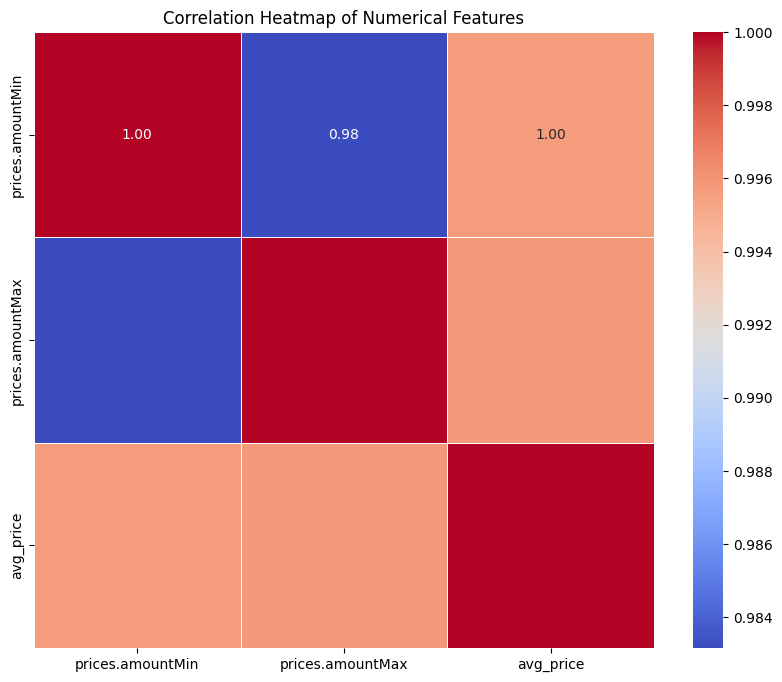

In [16]:
# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = df_eda[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


The correlation heatmap shows a very strong positive correlation between `prices.amountMin`, `prices.amountMax`, and `avg_price`, with correlation coefficients close to 1, indicating that these numerical features increase together almost perfectly. This confirms that as the minimum price or maximum price of a shoe increases, the average price also increases proportionately.

### 3. Performing a Principal Component Analysis (PCA) to understand the key factors driving product prices
Principal Component Analysis (PCA) on a dataset of shoe products, reducing the dimensionality of the data to two principal components. 

Steps: 
- One-hot encode the categorical variables (brand, merchant_source, shoe_category, prices_condition, prices_currency).
- Standardize the features if necessary.
- Fit PCA on the encoded data.
- Plot the first two principal components to see how these features influence pricing.

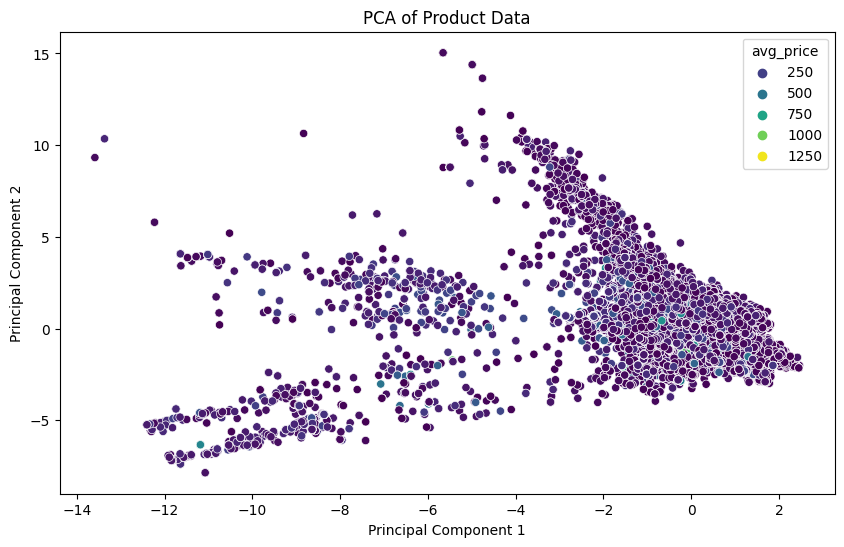

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('shoes.csv')

# Select relevant features
selected_features = ['brand', 'merchant_source', 'shoe_category', 'prices.condition', 'prices.isSale','prices.currency', 'avg_price','name','colors']
data = data[selected_features]

# Drop missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['avg_price'])
y = data['avg_price']

# Define the preprocessing steps for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), ['brand', 'merchant_source', 'shoe_category', 'prices.condition', 'prices.isSale','prices.currency','name','colors'])
    ])

# Create a pipeline to preprocess the data and apply PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # to standardize the features without centering
    ('pca', PCA(n_components=2))   # Apply PCA to reduce to 2 components
])

# Fit and transform the data
X_pca = pipeline.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['avg_price'] = y.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='avg_price', data=pca_df, palette='viridis')
plt.title('PCA of Product Data')
plt.show()


The PCA plot shows how different shoe products are distributed based on their key features, like brand, category, and condition, reduced to two main components for easier visualization. Each point represents a shoe product, and the color indicates its average price. This visualization helps identify patterns, such as groups of shoes that share similar features and price ranges, making it easier to see how product characteristics relate to their pricing. Essentially, it provides a simplified view of the data, highlighting how different factors might influence shoe prices.

From the PCA plot, we can infer that most shoes fall into a similar price category, indicated by the dense clustering of points with similar colors (mostly darker shades) in a specific region of the plot. This suggests that a majority of the shoe products have average prices on the lower end of the spectrum. There are fewer points with lighter colors, indicating that higher-priced shoes are less common and tend to be more spread out or form smaller clusters, suggesting distinct feature sets for higher-priced products. This distribution helps in understanding that most of the shoes in the dataset are priced moderately, with only a few outliers being significantly more expensive.